# Multicomponent system - Steel example

## Importing modules

In [19]:
from pycalphad import Database, equilibrium, variables as v

import matplotlib.pyplot as plt
import numpy as np
from pycalphad.plot.utils import phase_legend

## Define file paths for program and database

In [20]:
# Set the file path
directory = r'C:\Users\jose.muniz\Documents\Projects\SLM\Pycalphad\Multicomponent - Steel\\'
tdb_diretory = r'C:\Users\jose.muniz\Documents\Projects\SLM\Pycalphad\databases\\'

## Load database

It uses an open database from MatCalc modified to work with pycalphad
Pycalphad has Matcalc compatible databases including Al and Ni

In [68]:
tdb = Database(tdb_diretory + 'COST507_Sundman.tdb')
#tdb = Database(tdb_diretory + 'mc_al_v2.032.pycalphad.tdb')

In [69]:
phases = list(set(tdb.phases.keys()))
# SS316 is actually Fe-17Cr-12Ni-2.5Mo-0.08C-2Mn-0.75Si-0.1N
# We simplified the system here to meet constraints in our workshop deployment
mass_fracs = {v.W('CU'): 4.5/100, v.W('SI'): 17./100, v.W('MG'): 0.5/100}

# Convert v.W (weight fraction) to mole fraction
conds = v.get_mole_fractions(mass_fracs, 'AL', tdb)
conds[v.T] = (753, 1000, 0.5)
conds[v.P] = 101325
conds[v.N] = 1

# calc_opts={'pdens': 50} adjusted point density of calculation to speed it up.
eq = equilibrium(tdb, ['AL', 'CU', 'SI', 'MG', 'VA'], phases, conds, calc_opts={'pdens': 1000})

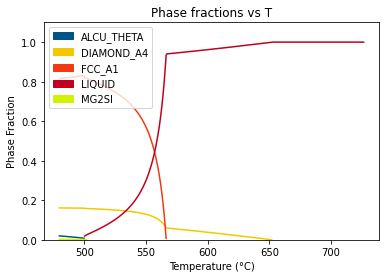

In [70]:

phases = sorted(set(eq.Phase.values.flatten()) - {''})
phase_handles, phasemap = phase_legend(phases)

plt.gca().set_title('Phase fractions vs T')
plt.gca().set_xlabel('Temperature (°C)')
plt.gca().set_ylabel('Phase Fraction')
plt.gca().set_ylim((0,1.1))
#plt.gca().set_xlim((750-273.15, 1000-273.15))

for name in phases:
    phase_indices = np.nonzero(eq.Phase.values == name)
    #plt.scatter(np.take(eq['T'].values, phase_indices[2])-273.15, eq.NP.values[phase_indices], color=phasemap[name])
    plt.plot(np.take(eq['T'].values, phase_indices[2]) - 273.15, eq.NP.values[phase_indices], color=phasemap[name])

plt.gca().legend(phase_handles, phases, loc='upper left')

## Composition of the phases

Can do the same plot for each phase. It just need to be modified or copy and paste in a different cell

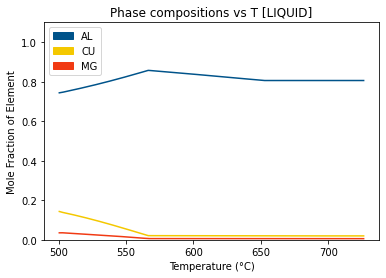

In [65]:
plt.gca().set_title('Phase compositions vs T [LIQUID]')
plt.gca().set_xlabel('Temperature (°C)')
plt.gca().set_ylabel('Mole Fraction of Element')
plt.gca().set_ylim((0,1.1))
#plt.gca().set_xlim((700-273.15, 1300-273.15))

elements = ['AL', 'CU', 'MG']

phase_handles, phasemap = phase_legend(elements)

for name in ['LIQUID']:
    phase_indices = np.nonzero(eq.Phase.values == name)
    for el in elements:
        plt.plot(np.take(eq['T'].values, phase_indices[2])-273.15, eq.X.sel(component=el).values[phase_indices], color=phasemap[el])
plt.gca().legend(phase_handles, elements, loc='upper left')